In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture

#!pip install flexmix
#!pip install flexclust


In [207]:
data = pd.read_csv("C:\\Users\\kamlesh prajapat\\OneDrive\\Desktop\\Books\\Internship\\mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [208]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [210]:
mcdonalds_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
                     'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
                     'Age', 'VisitFrequency', 'Gender']

MD_x = np.array(data.iloc[:, 0:11])
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)

column_names = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
                'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

result = pd.DataFrame({'Column': column_names, 'Mean': col_means})

print(result)

        Column  Mean
0        yummy  0.55
1   convenient  0.91
2        spicy  0.09
3    fattening  0.87
4       greasy  0.53
5         fast  0.90
6        cheap  0.60
7        tasty  0.64
8    expensive  0.36
9      healthy  0.20
10  disgusting  0.24


###### The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

In [211]:
data.shape

(1453, 15)

In [212]:
macdo_df = data.iloc[:, :11]
macdo_df = (macdo_df == "Yes").astype(int)
column_means = np.round(macdo_df.mean(), 2)

column_names = macdo_df.columns

for feature, mean_value in zip(column_names, column_means):
    print(f"{feature}: {mean_value}")

yummy: 0.55
convenient: 0.91
spicy: 0.09
fattening: 0.87
greasy: 0.53
fast: 0.9
cheap: 0.6
tasty: 0.64
expensive: 0.36
healthy: 0.2
disgusting: 0.24


In [213]:
macdo_df.shape

(1453, 11)

# PCA

In [214]:
# Assuming 'MD_x' is the data matrix obtained in the previous code

MD_pca = PCA()
MD_pca.fit(MD_x)

# Extracting the summary statistics
summary_stats = {
    'Standard deviation': np.round(MD_pca.explained_variance_, 4),
    'Proportion of Variance': np.round(MD_pca.explained_variance_ratio_, 4),
    'Cumulative Proportion': np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4)
}

# Creating a DataFrame for the summary statistics
result = pd.DataFrame(summary_stats)
result.index = ['PC'+str(i+1) for i in range(len(summary_stats['Standard deviation']))]

print(result)


      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1               0.5731                  0.2994                 0.2994
PC2               0.3690                  0.1928                 0.4922
PC3               0.2546                  0.1330                 0.6253
PC4               0.1590                  0.0831                 0.7084
PC5               0.1138                  0.0595                 0.7679
PC6               0.0963                  0.0503                 0.8182
PC7               0.0839                  0.0438                 0.8620
PC8               0.0757                  0.0395                 0.9016
PC9               0.0704                  0.0368                 0.9383
PC10              0.0619                  0.0324                 0.9707
PC11              0.0561                  0.0293                 1.0000


In [215]:

mcdonalds_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
                     'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

MD_pca = PCA()
MD_pca.fit(MD_x)

# Printing standard deviations
print("Standard deviations (1, .., p={0}):".format(len(MD_pca.explained_variance_)))
print(np.round(np.sqrt(MD_pca.explained_variance_), 1))

# Printing rotation matrix
print("Rotation (n x k) = ({0} x {1}):".format(len(MD_x), len(mcdonalds_columns)))

rotation_matrix = np.round(MD_pca.components_.T, 3) * -1
rotation_df = pd.DataFrame(rotation_matrix, columns=['PC{}'.format(i+1) for i in range(rotation_matrix.shape[1])],
                           index=mcdonalds_columns)
print(rotation_df)



Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Rotation (n x k) = (1453 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304 -0.055  0.308 -0.171  0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063  0.142 -0.278  0.348  0.060  0.113  0.018   
spicy       0.006 -0.019  0.037 -0.198 -0.071  0.355 -0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322  0.354  0.073  0.407  0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802 -0.254 -0.361 -0.209 -0.036  0.138  0.003   
fast        0.108  0.087  0.065  0.097 -0.108  0.595  0.087  0.628 -0.166   
cheap       0.337  0.611  0.149 -0.119  0.129  0.103  0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287  0.003  0.211  0.077 -0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024 -0.068  0.003  0.261  0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192 -0.763 -0.288  0.178  0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089 -0.370  

C:\Users\kamlesh prajapat\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


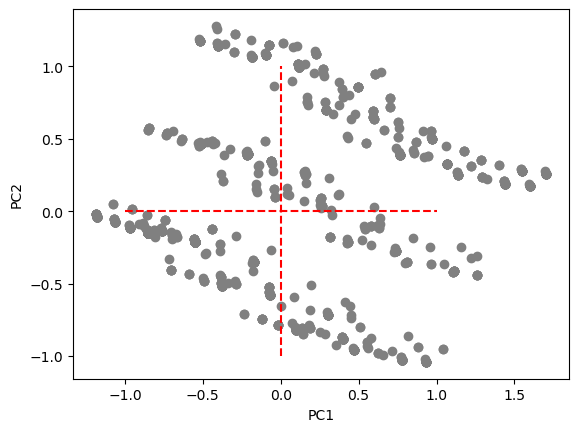

In [216]:
import matplotlib.pyplot as plt


# Plot predicted values
predicted_values = MD_pca.transform(macdo_df)
plt.scatter(predicted_values[:, 0], predicted_values[:, 1], color='grey')

# Plot projected axes
plt.plot([0, 0], [-1, 1], color='r', linestyle='--')
plt.plot([-1, 1], [0, 0], color='r', linestyle='--')

# Set axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


# K-Means

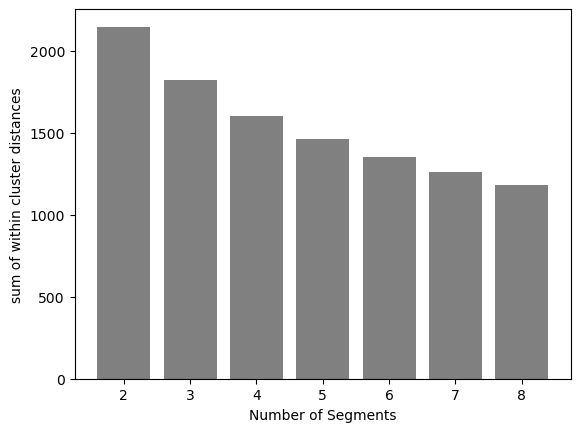

In [217]:

np.random.seed(1234)

k_values = range(2, 9)
nrep = 10
wcss = []

# Perform K-means clustering for different k values and calculate the WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=nrep)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)

# Plot the WCSS as a bar plot
plt.bar(k_values, wcss, color = "grey")
plt.xlabel('Number of Segments')
plt.ylabel('sum of within cluster distances')
plt.show()


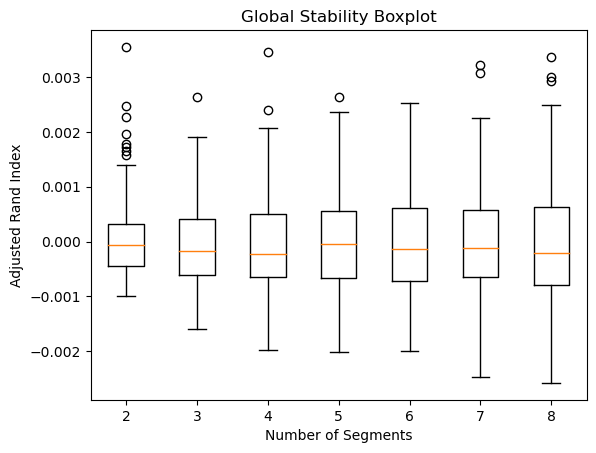

In [218]:

np.random.seed(1234)

k_values = range(2, 9)
nrep = 10
nboot = 200
adjusted_rand_indices = []

# Perform bootstrap clustering for different k values
for k in k_values:
    boot_rand_indices = []
    for _ in range(nboot):
        boot_samples = resample(MD_x, random_state=np.random)
        kmeans = KMeans(n_clusters=k, n_init=nrep)
        kmeans.fit(boot_samples)
        labels = kmeans.labels_
        true_labels = np.random.randint(2, 9, len(boot_samples)) 
        rand_index = adjusted_rand_score(true_labels, labels)
        boot_rand_indices.append(rand_index)
    adjusted_rand_indices.append(boot_rand_indices)

# Plot the global stability boxplot
plt.boxplot(adjusted_rand_indices)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.xticks(np.arange(len(k_values)) + 1, k_values)
plt.show()


# Using Mixtures of Distributions

In [194]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

X = MD_x  # Assuming MD_x is the input data

bic_scores = []
models = []

for k in range(2, 9):
    bic = []
    for _ in range(10):
        gmm = GaussianMixture(n_components=k, covariance_type='full')
        gmm.fit(X)
        bic.append(gmm.bic(X))
    bic_scores.append(np.mean(bic))
    models.append(gmm)

best_model_index = np.argmin(bic_scores)
best_model = models[best_model_index]

print(best_model)


GaussianMixture(n_components=7)


In [203]:
from sklearn.mixture import GaussianMixture

n_components = range(2, 9)
models = []
for n in n_components:
    model = GaussianMixture(n_components=n)
    model.fit(macdo_df)
    models.append(model)

import matplotlib.pyplot as plt
aic = [model.aic(macdo_df) for model in models]
bic = [model.bic(macdo_df) for model in models]
icl = [model.lower_bound_ for model in models]

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, icl, label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.show()

best_model = models[2]

kmeans = KMeans(n_clusters=4,  n_init=10)
kmeans.fit(macd_x)
kmeans_clusters = kmeans.predict(macdo_df)
mixture_clusters = best_model.predict(macdo_df)

table = np.column_stack((kmeans_clusters, mixture_clusters))
print(table)

mixture_model = GaussianMixture(n_components=4)
mixture_model.fit(macd_x, kmeans_clusters)

new_mixture_clusters = mixture_model.predict(macdo_df)
table = np.column_stack((kmeans_clusters, new_mixture_clusters))
print(table)

log_likelihood = mixture_model.score(macdo_df)
print(log_likelihood)

log_likelihood_best = best_model.score(macdo_df)
print(log_likelihood_best)

ValueError: Expected 2D array, got 1D array instead:
array=[2. 0. 0. ... 0. 1. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.